In [1]:
# Imports and boilerplate to make graphs look better
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import wave
from IPython.display import Audio

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Problem: Neural Network to learn math functions

Initially, let's try to learn y=x^2...

In [46]:
# Training x and training y
x_train = np.random.uniform(-5, 5, 1000)
y_train = x_train**2 + np.random.normal(0, 1, 1000)

# To draw the true `y=x^2`...
x_true = np.linspace(-5, 5, 1000)
y_true = x_true**2

# Test data - note that we go outside the bounds of the testing data
x_test = np.linspace(-10, 10, 100)

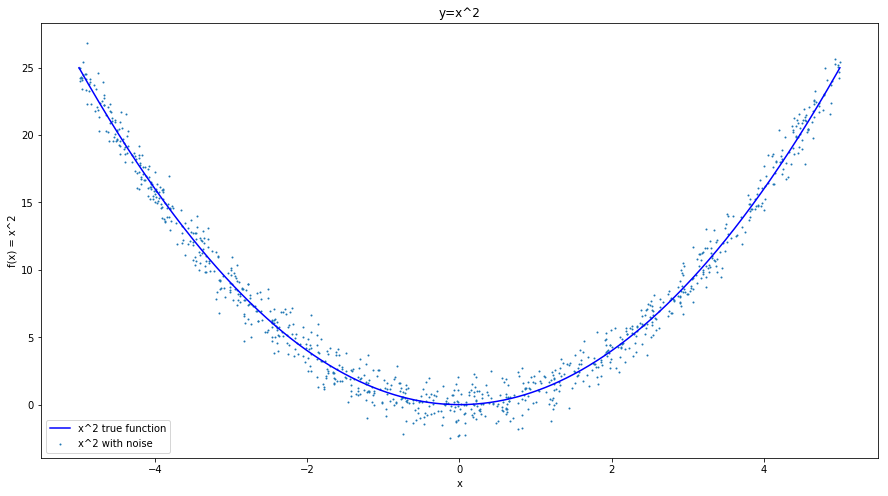

In [47]:
setup_graph(title='y=x^2', x_label='x', y_label='f(x) = x^2', fig_size=(15,8))
plt.scatter(x_train, y_train, s=1, label="x^2 with noise")
plt.plot(x_true, y_true, c="b", label="x^2 true function")
plt.legend(loc="best")
plt.show()

In [162]:
from keras.models import Sequential
from keras.layers import Dense

# Honestly, the following layes were "empirically derived" - it totally
# feels like a job for ML - to build the ML models.
model = Sequential()
model.add(Dense(units=5, input_dim=1))
model.add(Dense(units=10, activation='softmax'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=1, activation='linear'))
# The 'adam' optimizer works HORRIBLY for this type of learning, but 'sgd' seems to work pretty well
model.compile(loss='mean_squared_error', optimizer='sgd')

In [163]:
model.fit(x_train.reshape(-1,1), y_train.reshape(-1,1), epochs=5, batch_size=64)

Epoch 1/5
1000/1000 [==============================] - 1s 1ms/step - loss: 83.2664
Epoch 2/5
1000/1000 [==============================] - 0s 31us/step - loss: 41.9318
Epoch 3/5
1000/1000 [==============================] - 0s 25us/step - loss: 28.7633
Epoch 4/5
1000/1000 [==============================] - 0s 31us/step - loss: 19.1830
Epoch 5/5
1000/1000 [==============================] - 0s 29us/step - loss: 23.2353


In [164]:
y_predicted = model.predict(x_test, batch_size=64)

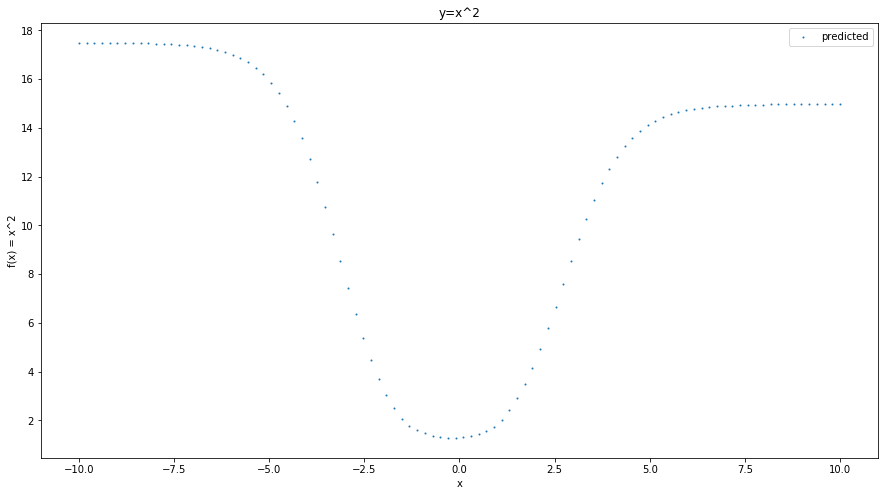

In [165]:
setup_graph(title='y=x^2', x_label='x', y_label='f(x) = x^2', fig_size=(15,8))
plt.scatter(x_test, y_predicted, s=1, label="predicted")
plt.legend(loc="best")
plt.show()

# Try to learn y=x^3

In [183]:
# Training x and training y
x2_train = np.random.uniform(-5, 5, 1000)
y2_train = x2_train**3 + np.random.normal(0, 1, 1000)

# Test data - note that we go outside the bounds of the testing data
x2_test = np.linspace(-10, 10, 100)

In [184]:
# Honestly, the following layes were "empirically derived" - it totally
# feels like a job for ML - to build the ML models.
model2 = Sequential()
model2.add(Dense(units=5, input_dim=1))
model2.add(Dense(units=10, activation='softmax'))
model2.add(Dense(units=12, activation='relu'))
model2.add(Dense(units=1, activation='linear'))
# The 'adam' optimizer works HORRIBLY for this type of learning, but 'sgd' seems to work pretty well
model2.compile(loss='mean_squared_error', optimizer='sgd')

In [185]:
model2.fit(x2_train.reshape(-1,1), y2_train.reshape(-1,1), epochs=5, batch_size=64)

Epoch 1/5
1000/1000 [==============================] - 1s 1ms/step - loss: 2145.1926
Epoch 2/5
1000/1000 [==============================] - 0s 30us/step - loss: 1741.5173
Epoch 3/5
1000/1000 [==============================] - 0s 37us/step - loss: 1280.5476
Epoch 4/5
1000/1000 [==============================] - 0s 34us/step - loss: 1336.6986
Epoch 5/5
1000/1000 [==============================] - 0s 33us/step - loss: 1327.8451


In [186]:
y2_predicted = model2.predict(x2_test, batch_size=64)

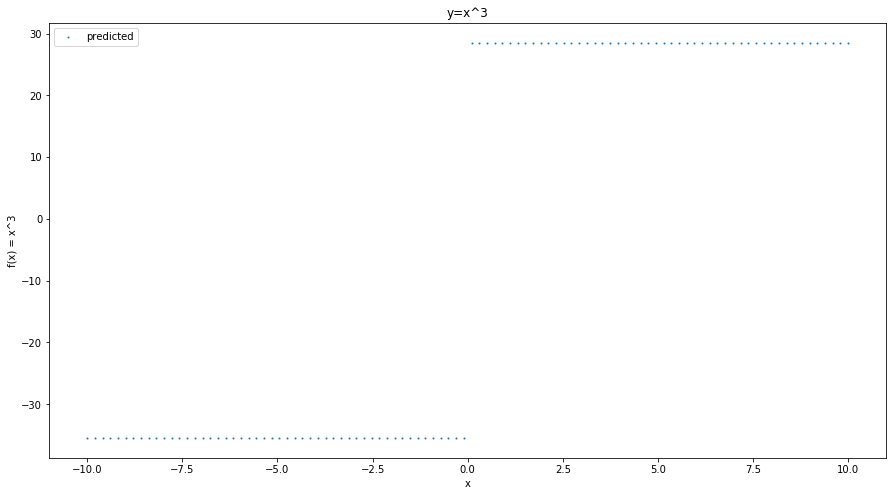

In [187]:
setup_graph(title='y=x^3', x_label='x', y_label='f(x) = x^3', fig_size=(15,8))
plt.scatter(x2_test, y2_predicted, s=1, label="predicted")
plt.legend(loc="best")
plt.show()